In [1]:
!pip install pandas

In [39]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
plt.rc("font",size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='white')
sns.set(style = "whitegrid",color_codes=True)

In [3]:
Bank = pd.read_csv("C:/Users/dell/Documents/bank-full.csv",sep=";", quotechar=';')
Bank = Bank.dropna()
print(Bank.shape)
Bank.columns= Bank.columns.str.replace('"', '')
print(list(Bank.columns))

(28476, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [4]:
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143.0,"""yes""","""no""","""unknown""",5.0,"""may""",261.0,1.0,-1.0,0.0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29.0,"""yes""","""no""","""unknown""",5.0,"""may""",151.0,1.0,-1.0,0.0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2.0,"""yes""","""yes""","""unknown""",5.0,"""may""",76.0,1.0,-1.0,0.0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506.0,"""yes""","""no""","""unknown""",5.0,"""may""",92.0,1.0,-1.0,0.0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1.0,"""no""","""no""","""unknown""",5.0,"""may""",198.0,1.0,-1.0,0.0,"""unknown""","""no"""


In [5]:
Bank = Bank.applymap(lambda x:x.strip('""') if isinstance(x,str)else x)
Bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28471,26,student,single,unknown,no,826.0,no,no,cellular,29.0,jan,177.0,1.0,-1.0,0.0,unknown,no
28472,60,technician,divorced,secondary,no,615.0,yes,no,cellular,29.0,jan,130.0,1.0,-1.0,0.0,unknown,no
28473,33,technician,single,secondary,no,145.0,yes,no,cellular,29.0,jan,369.0,2.0,-1.0,0.0,unknown,no
28474,31,self-employed,married,tertiary,no,229.0,no,no,cellular,29.0,jan,184.0,1.0,-1.0,0.0,unknown,no


In [6]:
Bank['campaign'].unique()

array([ 1.,  2.,  3.,  5.,  4.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       19., 14., 24., 16., 32., 18., 22., 15., 17., 25., 21., 43., 51.,
       63., 41., 26., 28., 55., 50., 38., 23., 20., 29., 31., 37., 30.,
       46., 27., 58., 33., 35., 34., 36., 39., 44.])

In [7]:
Bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [8]:
Bank['y']

0        no
1        no
2        no
3        no
4        no
         ..
28471    no
28472    no
28473    no
28474    no
28475    no
Name: y, Length: 28476, dtype: object

In [9]:
x=[]
for i in Bank['y']:
    if i=="no":
        x.append(0)
    else:
        x.append(1)

In [10]:
Bank['y']=x

In [11]:
Bank['y'].value_counts()

0    27051
1     1425
Name: y, dtype: int64

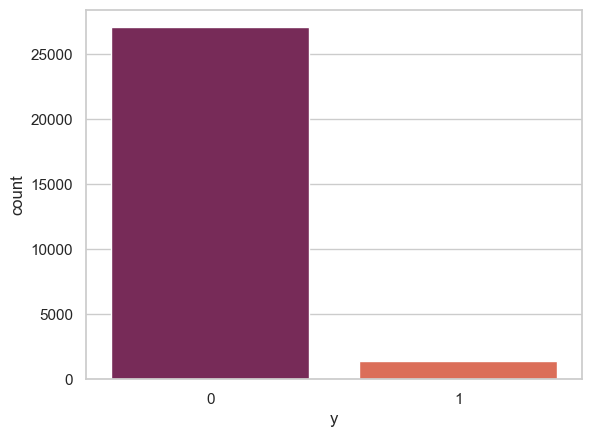

<Figure size 640x480 with 0 Axes>

In [12]:
sns.countplot(x ='y',data = Bank,palette='rocket')
plt.show()
plt.savefig('count_plot')

In [13]:
count_no_sub = len(Bank[Bank['y']==0])
count_sub = len(Bank[Bank['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print('percentage of no subscription is',pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription ",pct_of_sub*100)

percentage of no subscription is 94.99578592498946
percentage of subscription  5.004214075010535


In [14]:
Bank.groupby(['y']).mean(numeric_only=True)

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,41.280027,1289.812391,17.425123,221.173968,3.150567,5.577243,0.118997
1,40.208421,1519.261053,17.172632,841.265263,2.897544,3.244211,0.077895


In [15]:
Bank.groupby(['job']).mean(numeric_only=True)

,age,balance,day,duration,campaign,pdays,previous,y
job,,,,,,,,
admin.,40.015804,1149.710155,17.290854,245.874243,2.973100,5.443847,0.106927,0.048420
blue-collar,40.702418,1082.617638,16.802077,260.955983,3.104464,4.948078,0.090205,0.047737
entrepreneur,42.439885,1542.471374,17.449427,248.107824,3.005725,8.450382,0.182252,0.054389
housemaid,45.761227,1303.775465,16.826944,244.991238,3.062432,2.723987,0.072289,0.035049
management,40.914423,1705.264207,17.828182,247.076105,3.302260,5.975241,0.144234,0.052343
retired,55.797784,1403.759003,16.596491,258.126500,2.776547,2.478301,0.067405,0.050785
self-employed,41.358382,1577.237958,17.740848,269.403661,3.175337,6.810212,0.132948,0.057803
services,39.492359,1020.390235,17.236303,253.774879,3.034290,5.966083,0.117779,0.045844
student,29.131980,1057.649746,18.208122,254.883249,2.837563,2.822335,0.065990,0.065990


In [16]:
Bank.groupby(['marital']).mean(numeric_only=True)

,age,balance,day,duration,campaign,pdays,previous,y
marital,,,,,,,,
divorced,45.026277,1076.190657,17.494599,259.461314,2.907445,6.491971,0.133431,0.066861
married,42.966964,1366.536345,17.324619,245.730201,3.186852,5.438010,0.115431,0.042356
single,34.784073,1241.750542,17.602110,265.579564,3.123717,5.008816,0.112733,0.061859


In [17]:
Bank.groupby(['education']).mean(numeric_only=True)

,age,balance,day,duration,campaign,pdays,previous,y
education,,,,,,,,
primary,44.956683,1156.118415,16.585111,246.549630,3.129081,3.370919,0.074663,0.043317
secondary,40.385873,1120.891561,17.442681,253.918057,3.034603,5.858661,0.121994,0.049452
tertiary,40.093824,1685.980987,17.883932,252.487262,3.308065,6.138437,0.139555,0.056419
unknown,44.967071,1491.816291,17.034662,250.948873,3.300693,3.986135,0.063258,0.039861


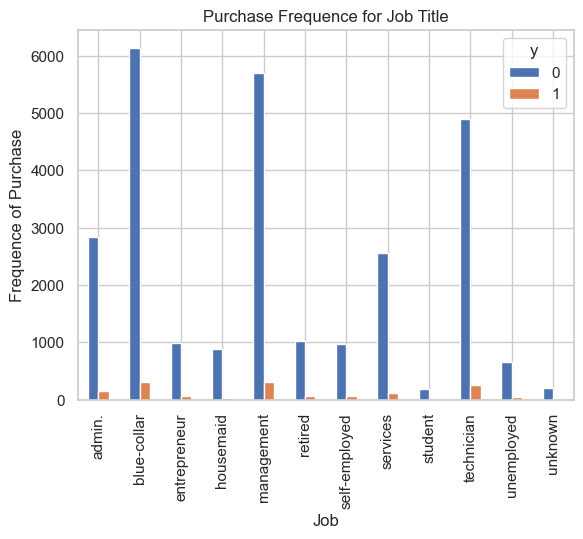

In [18]:
%matplotlib inline
table=pd.crosstab(Bank.job, Bank.y).plot(kind='bar')
plt.title('Purchase Frequence for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequence of Purchase')
plt.savefig('purchase_fre_job')

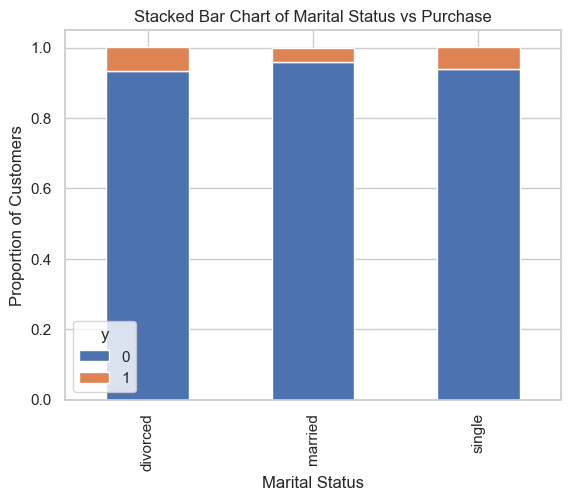

In [19]:
table =pd.crosstab(Bank.marital,Bank.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar', stacked =True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('marital_vs_pur_stack')

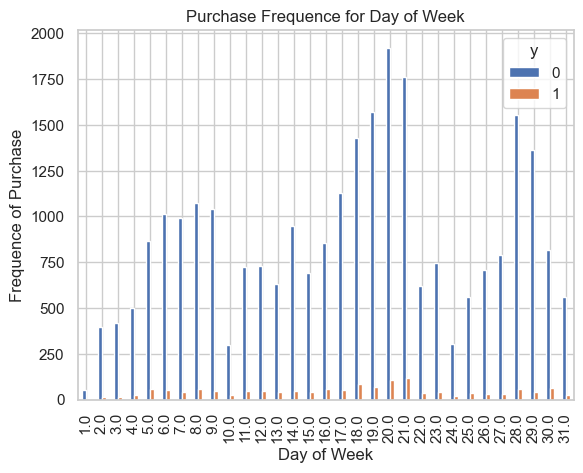

In [20]:
pd.crosstab(Bank.day,Bank.y).plot(kind='bar')
plt.title('Purchase Frequence for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequence of Purchase')
plt.savefig('pur_dayofweek_bar')

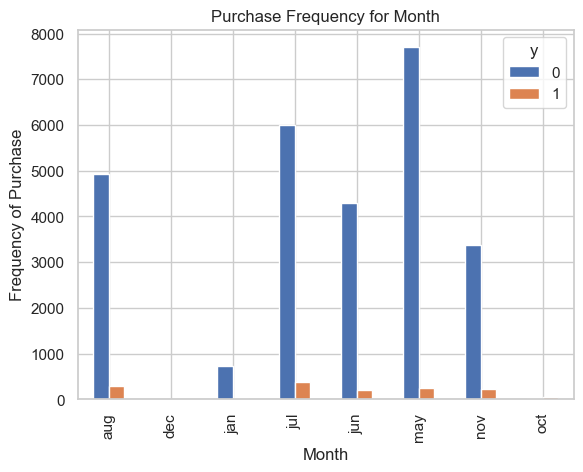

In [21]:
pd.crosstab(Bank.month,Bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel("Frequency of Purchase")
plt.savefig('Pur_month_bar')

Text(0, 0.5, 'Frequency of Purchase')

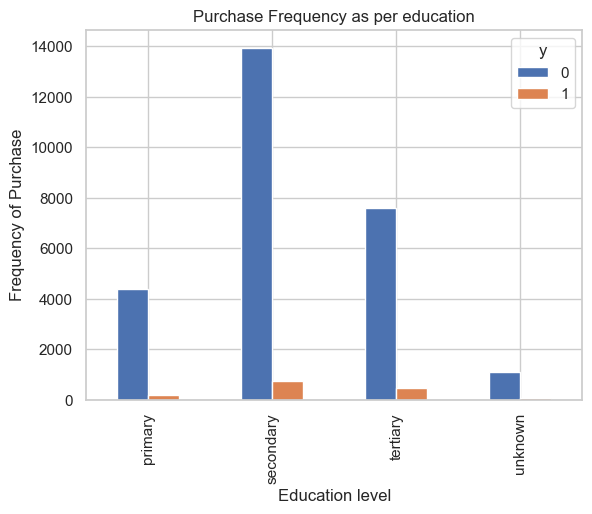

In [22]:
pd.crosstab(Bank.education,Bank.y).plot(kind='bar')
plt.title('Purchase Frequency as per education')
plt.xlabel('Education level')
plt.ylabel('Frequency of Purchase')

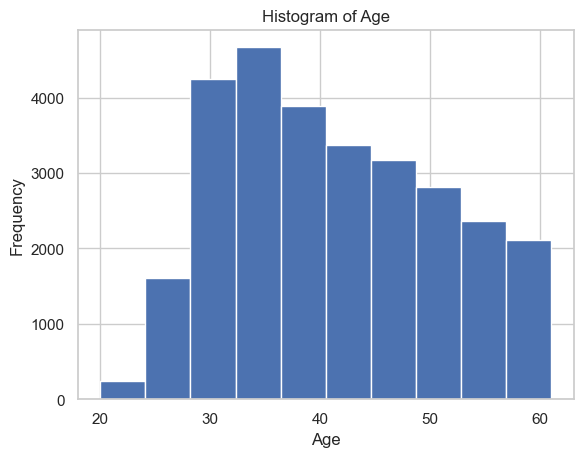

In [23]:
Bank.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Text(0, 0.5, 'Frequency')

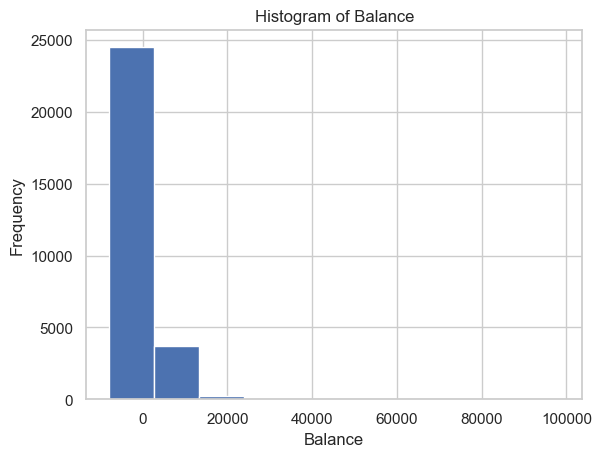

In [24]:
Bank.balance.hist()
plt.title('Histogram of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')

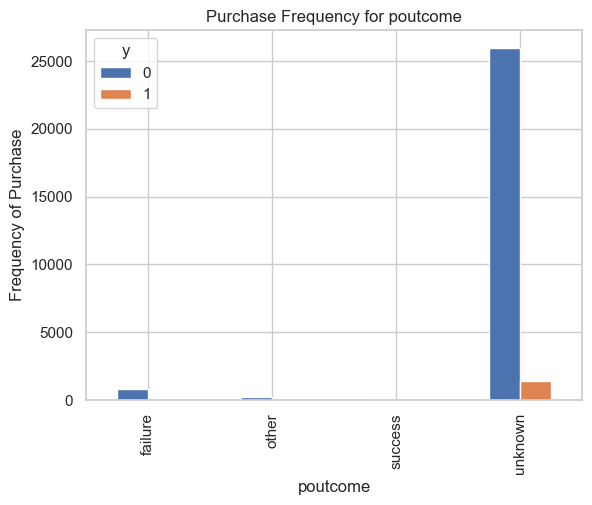

In [25]:
pd.crosstab(Bank.poutcome,Bank.y).plot(kind="bar")
plt.title('Purchase Frequency for poutcome')
plt.xlabel('poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout-bar')

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
cat_vars =['job','marital','education','default','housing','loan','contact','month','day','poutcome','campaign']
for var in cat_vars:
    cat_list='var'+'-'+var
    cat_list = pd.get_dummies(Bank[var], prefix = var)
    Bank1 = pd.concat([Bank,cat_list],axis=1)
    Bank.drop(var,axis=1,inplace = True)
    Bank=Bank1
cat_vars = ['job','marital','education','default','housing','loan','contact','month','day','poutcome','campaign']
Bank_vars = Bank.columns.values.tolist()
to_keep=[i for i in Bank_vars if i not in cat_vars]

In [28]:
Bank_final=Bank[to_keep]
Bank_final.columns.values

array(['age', 'balance', 'duration', 'pdays', 'previous', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_jan', 'month_jul', 'month_jun', 'month_may', 'month_nov',
       'month_oct', 'day_1.0', 'day_2.0', 'day_3.0', 'day_4.0', 'day_5.0',
       'day_6.0', 'day_7.0', 'day_8.0', 'day_9.0', 'day_10.0', 'day_11.0',
       'day_12.0', 'day_13.0', 'day_14.0', 'day_15.0', 'day_16.0',
       'day_17.0', 'day_18.0', 'day_19.0', 'day_20.0', 'day_21.0',
 

In [29]:
X = Bank_final.loc[:, Bank_final.columns != 'y']
y = Bank_final.loc[:, Bank_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os =SMOTE(random_state=0)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size = 0.3, random_state= 0)
columns = X_train.columns
os_Bank_X,os_Bank_y= os.fit_resample(X_train, y_train.values.ravel())
os_Bank_X = pd.DataFrame(data =os_Bank_X,columns = columns)
os_Bank_y = pd.DataFrame(data=os_Bank_y,columns=['y'])

print("length of oversampled data is ",len(os_Bank_X))
print("Number of no subscription in oversampled data",len(os_Bank_y[os_Bank_y['y']==0]))
print("Number of subscription",len(os_Bank_y[os_Bank_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_Bank_y[os_Bank_y['y']==0])/len(os_Bank_X))
print("Proportion of subscription data in oversampled data is ",len(os_Bank_y[os_Bank_y['y']==1])/len(os_Bank_X))

length of oversampled data is  37842
Number of no subscription in oversampled data 18921
Number of subscription 18921
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [30]:
Bank_final_vars = Bank_final.columns.values.tolist()
y = ['y']
X = [i for i in Bank_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'liblinear')
rfe = RFE(estimator=logreg,n_features_to_select= 20)
rfe = rfe.fit(os_Bank_X, os_Bank_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True False  True  True
  True  True  True  True False  True  True  True False  True False  True
 False False  True False False False  True  True  True  True False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[ 97 101  93  92  90  17  20  18  14  19  15  21  16  24  22  23  13  26
  25  27  31  32  33  30  45  44  29  28  41  40  78  77  79  37  42  35
  38  36  34  39  46  12   1   1   1   4   1   1   1   1   1   1   5   1
   1   1  11   1   9   1 

In [33]:
cols = ['job_unknown','marital_divorced','marital_married','day_4','day_5','day_6','day_7','day_8','day_10','day_13','day_16','day_17','day_18','day_19','day_20','day_25','day_26','day_27','day_28','day_30']
X = os_Bank_X.columns
y = os_Bank_y['y']

In [35]:
X= Bank.drop(columns=['y'])
y= Bank['y']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=0)
print('Number transactions X_train dataset:',X_train.shape)
print('Number transactions y_train dataset:',y_train.shape)
print('Number transactions X_test dataset:',X_test.shape)
print('Number transactions y_test dataset:', y_test.shape)

Number transactions X_train dataset: (22780, 135)
Number transactions y_train dataset: (22780,)
Number transactions X_test dataset: (5696, 135)
Number transactions y_test dataset: (5696,)


In [45]:
X_encoded = pd.get_dummies(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,test_size=0.4, random_state = 0)
logreg = LogisticRegression(solver = 'lbfgs',)
logreg.fit(X_train,y_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic Regression classifier on test set:{:.2f}'.format(logreg.score(X_test,y_test)))

Accuracy of logistic Regression classifier on test set:0.96


In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[10720   134]
 [  376   161]]


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     10854
           1       0.55      0.30      0.39       537

    accuracy                           0.96     11391
   macro avg       0.76      0.64      0.68     11391
weighted avg       0.95      0.96      0.95     11391



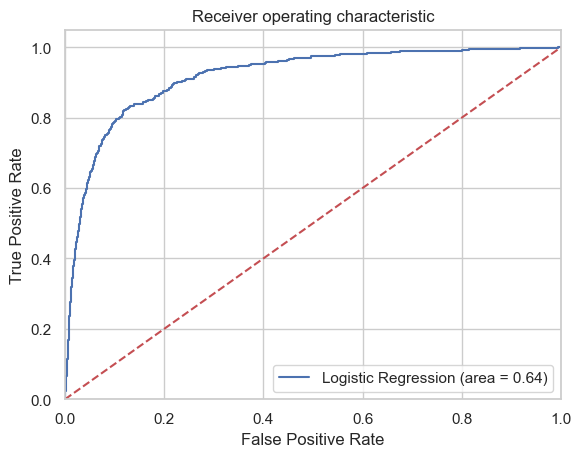

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()